## Question 11

In [1]:
import random
import numpy as np
from data_utils import load_CIFAR10
import wget, tarfile
import os
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
DATA_URL = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
out_fname = 'cifar-10-python.tar.gz'
 
wget.download(DATA_URL, out=out_fname)

tar = tarfile.open(out_fname)
tar.extractall()
tar.close()

os.remove(out_fname)


In [2]:
cifar10_dir = './cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ',X_train.shape)
print('Training labels shape: ',y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test labels shape: ',y_test.shape)
print('Number of classes: ',np.max(y_train)+1)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Number of classes:  10


In [3]:
X_train = np.reshape(X_train,(X_train.shape[0], -1))
X_test = np.reshape(X_test,(X_test.shape[0], -1))
print(X_train.shape,X_test.shape)
# In this experiment, we only use training dataset.

(50000, 3072) (10000, 3072)


In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, init='k-means++',n_init=30, max_iter=1000, random_state=0)
kmeans.fit(X_train)
X_predict = kmeans.predict(X_train)
print(" X_predict ", X_predict.shape)

 X_predict  (50000,)


In [5]:
#Clustering without dimension reduction

In [6]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train,kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y_train,kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y_train,kmeans.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(y_train,kmeans.labels_))
print("Adjusted Mutual Information Score: %.3f"% metrics.adjusted_mutual_info_score(y_train,kmeans.labels_))

Homogeneity: 0.078
Completeness: 0.080
V-measure: 0.079
Adjusted Rand-Index: 0.042
Adjusted Mutual Information Score: 0.079


In [7]:
#Clustering with dimension reduction with parameters r
r_list = [1,2,5,8,10,20,50,100,300]

In [8]:
from sklearn.decomposition import TruncatedSVD
def svd_kmeans(r):
    svd = TruncatedSVD(n_components=r, random_state=42)
    X_reduced = svd.fit_transform(X_train)
    km = KMeans(n_clusters=10, init='k-means++',n_init=30, max_iter=1000, random_state=0)
    km.fit(X_reduced)
    return [metrics.homogeneity_score(y_train, km.labels_),metrics.completeness_score(y_train, km.labels_),metrics.v_measure_score(y_train, km.labels_),metrics.adjusted_rand_score(y_train, km.labels_),metrics.adjusted_mutual_info_score(y_train, km.labels_)]
    

In [9]:
from sklearn.decomposition import NMF
def NMF_kmeans(r):
    model = NMF(n_components=r, init='random', random_state=42)
    X_reduced = model.fit_transform(X_train)
    km = KMeans(n_clusters=10, init='k-means++',n_init=30, max_iter=1000, random_state=0)
    km.fit(X_reduced)
    return [metrics.homogeneity_score(y_train, km.labels_),metrics.completeness_score(y_train, km.labels_),metrics.v_measure_score(y_train, km.labels_),metrics.adjusted_rand_score(y_train, km.labels_),metrics.adjusted_mutual_info_score(y_train, km.labels_)]

In [10]:
from matplotlib import pyplot as plt
import pandas as pd
def plot_measure(r_list,reduced_type):
    y=[]
    if reduced_type==1:
        print("PCA")
        for i in r_list:
            y.append(svd_kmeans(i))
        y = np.asarray(y).T.tolist()
        plt.figure()
        plt.plot(y[0])
        plt.xlabel("r components")
        plt.ylabel("Homogeneity")
        plt.xticks(range(10),r_list)
        plt.figure()
        plt.plot(y[1])
        plt.xlabel("r components")
        plt.ylabel("Completeness")
        plt.xticks(range(10),r_list)
        plt.figure()
        plt.plot(y[2])
        plt.xlabel("r components")
        plt.ylabel("V-measure")
        plt.xticks(range(10),r_list)
        plt.figure()
        plt.plot(y[3])
        plt.xlabel("r components")
        plt.ylabel("Adjusted Rand-Index")
        plt.xticks(range(10),r_list)
        plt.figure()
        plt.plot(y[4])
        plt.xlabel("r components")
        plt.ylabel("Adjusted Mutual Info Score")
        plt.xticks(range(10),r_list)
        df = pd.DataFrame({"r components":r_list,"Homogeneity":y[0],"Completeness":y[1],"V-measure":y[2],\
            "Adjusted Rand-Index":y[3],"Adjusted Mutual Info Score":y[4]},columns=['r components',\
            "Homogeneity","Completeness","V-measure","Adjusted Rand-Index","Adjusted Mutual Info Score"])
        print(df.head())
    else:
        print("NMF")
        for i in r_list:
            y.append(NMF_kmeans(i))
        y = np.asarray(y).T.tolist()
        plt.figure()
        plt.plot(y[0])
        plt.xlabel("r components")
        plt.ylabel("Homogeneity")
        plt.xticks(range(10),r_list)
        plt.figure()
        plt.plot(y[1])
        plt.xlabel("r components")
        plt.ylabel("Completeness")
        plt.xticks(range(10),r_list)
        plt.figure()
        plt.plot(y[2])
        plt.xlabel("r components")
        plt.ylabel("V-measure")
        plt.xticks(range(10),r_list)
        plt.figure()
        plt.plot(y[3])
        plt.xlabel("r components")
        plt.ylabel("Adjusted Rand-Index")
        plt.xticks(range(10),r_list)
        plt.figure()
        plt.plot(y[4])
        plt.xlabel("r components")
        plt.ylabel("Adjusted Mutual Info Score")
        plt.xticks(range(10),r_list)
        df = pd.DataFrame({"r components":r_list,"Homogeneity":y[0],"Completeness":y[1],"V-measure":y[2],\
            "Adjusted Rand-Index":y[3],"Adjusted Mutual Info Score":y[4]},columns=['r components',\
            "Homogeneity","Completeness","V-measure","Adjusted Rand-Index","Adjusted Mutual Info Score"])
        print(df.head())

PCA
   r components  Homogeneity  Completeness  V-measure  Adjusted Rand-Index  \
0             1     0.027507      0.029700   0.028562             0.010929   
1             2     0.060848      0.062493   0.061660             0.028480   
2             5     0.074858      0.075923   0.075387             0.039400   
3             8     0.076829      0.077996   0.077408             0.040599   
4            10     0.077778      0.078927   0.078349             0.041343   

   Adjusted Mutual Info Score  
0                    0.028207  
1                    0.061325  
2                    0.075059  
3                    0.077081  
4                    0.078022  


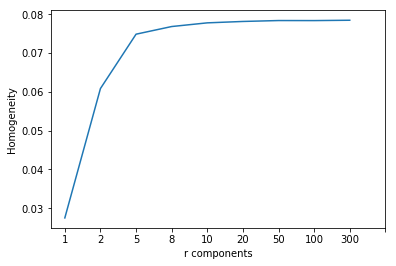

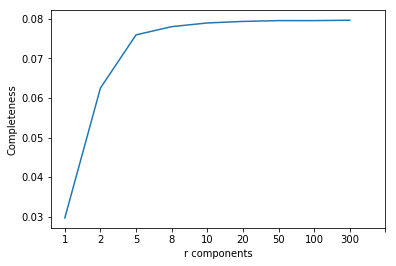

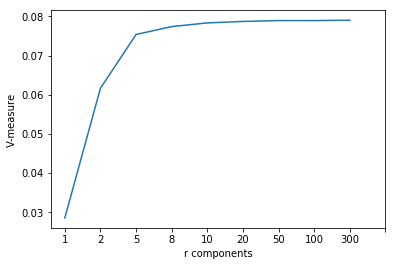

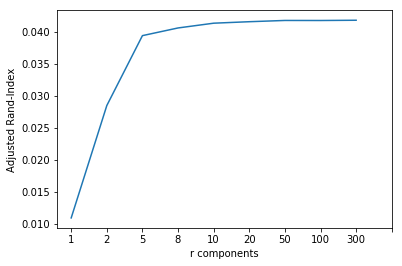

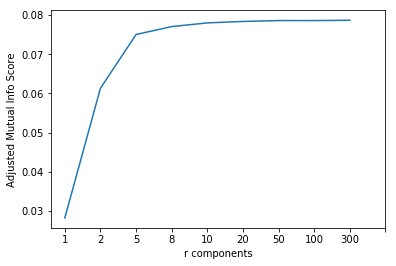

In [11]:
plot_measure(r_list,1)

NMF
   r components  Homogeneity  Completeness  V-measure  Adjusted Rand-Index  \
0             1     0.027507      0.029700   0.028562             0.010929   
1             2     0.063556      0.065053   0.064296             0.028511   
2             5     0.084254      0.085740   0.084991             0.043934   
3             8     0.082860      0.084031   0.083441             0.042305   
4            10     0.077931      0.079303   0.078611             0.042819   

   Adjusted Mutual Info Score  
0                    0.028207  
1                    0.063962  
2                    0.084666  
3                    0.083116  
4                    0.078284  


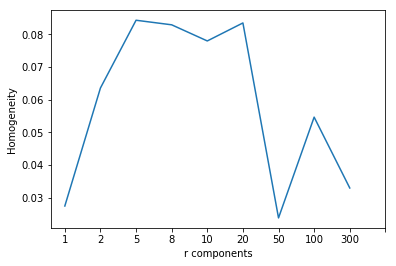

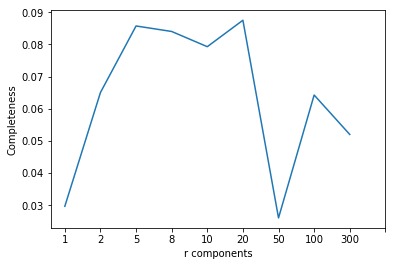

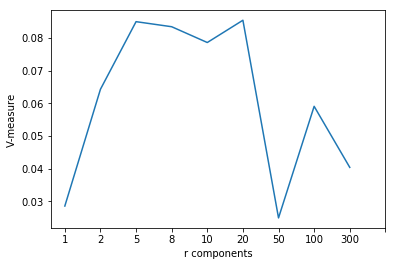

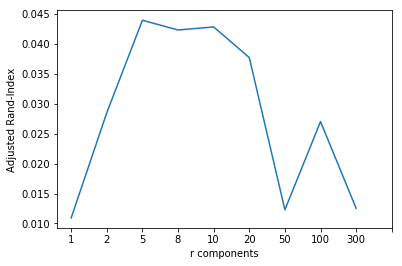

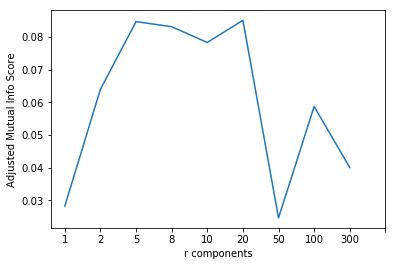

In [12]:
plot_measure(r_list,2)

In [13]:
def reduce_dim(svd_or_NMF, r, X):
    if svd_or_NMF==1:
        svd = TruncatedSVD(n_components=r, random_state=42)
        X_reduced = svd.fit_transform(X)
        title='(SVD)'
    else:
        model = NMF(n_components=r, init='random', random_state=42)
        X_reduced = model.fit_transform(X)
        title='(NMF)'
    return X_reduced, title
def visualization(X_rd, km, title, dim=2):
    if dim > 2:
        svd = TruncatedSVD(n_components=2, random_state=42)
        X_rd = svd.fit_transform(X_rd)
    plt.figure()
    color1=[]
    #for i in range(X_rd.shape[0]):
    #    color.append([0.5*(1-km.labels_[i]),0.5,0.5])

    plt.scatter(X_rd[:,0], X_rd[:,1], s=1, c=km.labels_)
    title1='clustring label'+title
    plt.xlabel(title1)
    plt.figure()
    color2=[]

    plt.scatter(X_rd[:,0], X_rd[:,1], s=1,c=y_train)
    title1='Ground truth class label'+title
    plt.xlabel(title1)
    plt.show()
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_train, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(y_train, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(y_train, km.labels_))
    print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(y_train, km.labels_))
    print("adjusted_mutual_info_score: %0.3f"
      % metrics.adjusted_mutual_info_score(y_train, km.labels_))

In [14]:
#Since in the range 20<=r<=300 and for original dataset, the 5 measures
# are very similar, we simply take r=20 for SVD.
r_svd = 20
#r=20 seems to be the best option for NMF
r_nmf = 20

## SVD

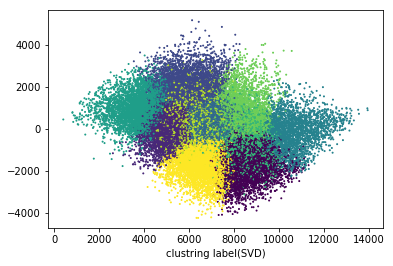

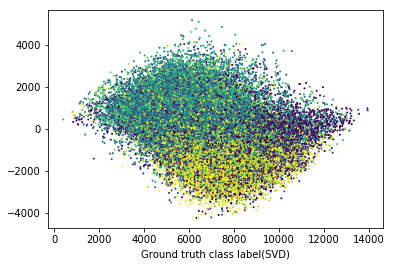

Homogeneity: 0.078
Completeness: 0.079
V-measure: 0.079
Adjusted Rand-Index: 0.042
adjusted_mutual_info_score: 0.078


In [15]:
X_rd_svd, title1=reduce_dim(1, r_svd, X_train)
km_rd_svd = KMeans(n_clusters=10, init='k-means++',n_init=30, max_iter=1000, random_state=0)
km_rd_svd.fit(X_rd_svd)
visualization(X_rd_svd, km_rd_svd, title1, X_rd_svd.shape[1])

# NMF

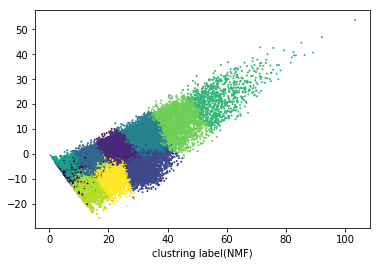

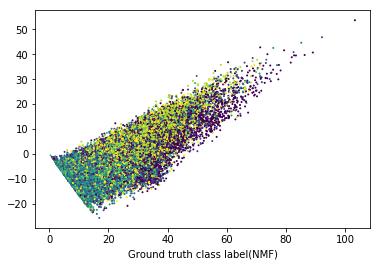

Homogeneity: 0.083
Completeness: 0.088
V-measure: 0.085
Adjusted Rand-Index: 0.038
adjusted_mutual_info_score: 0.085


In [16]:
X_rd_nmf, title2=reduce_dim(2, r_nmf, X_train)
km_rd_nmf = KMeans(n_clusters=10, init='k-means++',n_init=30, max_iter=1000, random_state=0)
km_rd_nmf.fit(X_rd_nmf)
visualization(X_rd_nmf, km_rd_nmf, title2, X_rd_nmf.shape[1])

In [17]:
def Scaling_features(X):
    X/=np.std(X,axis=0,ddof=1)
    return X
def log_transformation(X):
    return np.log(abs(X)+0.01)

# SVD Scaling featuring

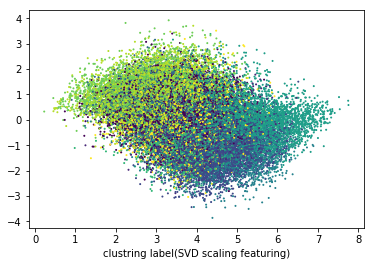

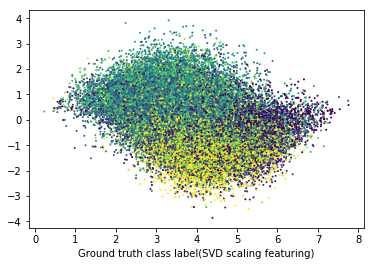

Homogeneity: 0.105
Completeness: 0.106
V-measure: 0.106
Adjusted Rand-Index: 0.057
adjusted_mutual_info_score: 0.105


In [18]:
X_rd_svd, title1=reduce_dim(1, r_svd, X_train)
X = Scaling_features(X_rd_svd)
km = KMeans(n_clusters=10, init='k-means++',n_init=30, max_iter=1000, random_state=0)
km.fit(X) 
visualization(X,km,'(SVD scaling featuring)',X.shape[1])

## NMF Scaling featuring

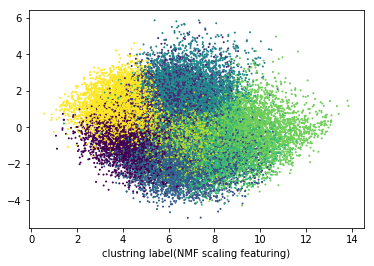

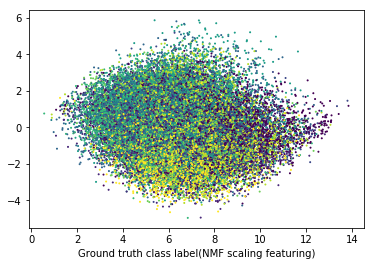

Homogeneity: 0.095
Completeness: 0.097
V-measure: 0.096
Adjusted Rand-Index: 0.050
adjusted_mutual_info_score: 0.096


In [19]:
X_rd_nmf, title2=reduce_dim(2, r_nmf, X_train)
X = Scaling_features(X_rd_nmf)
km = KMeans(n_clusters=10, init='k-means++',n_init=30, max_iter=1000, random_state=0)
km.fit(X) 
visualization(X,km,'(NMF scaling featuring)',X.shape[1])

## NMF Log transformation

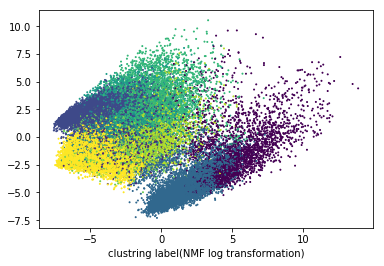

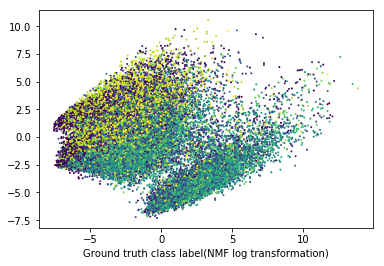

Homogeneity: 0.068
Completeness: 0.074
V-measure: 0.071
Adjusted Rand-Index: 0.031
adjusted_mutual_info_score: 0.071


In [20]:
X_rd_nmf, title2=reduce_dim(2, r_nmf, X_train)
X = log_transformation(X_rd_nmf)
km = KMeans(n_clusters=10, init='k-means++',n_init=30, max_iter=1000, random_state=0)
km.fit(X) 
visualization(X,km,'(NMF log transformation)',X.shape[1])

## NMF Scaling featuring and Log transformation

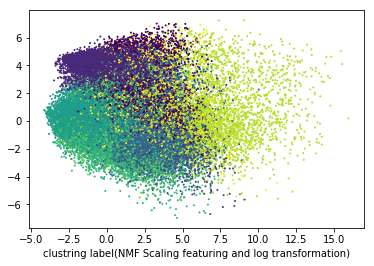

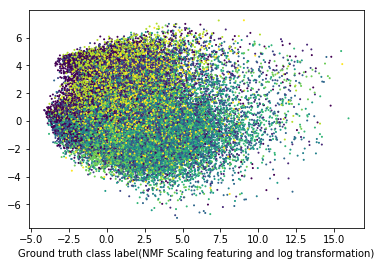

Homogeneity: 0.061
Completeness: 0.064
V-measure: 0.062
Adjusted Rand-Index: 0.027
adjusted_mutual_info_score: 0.062


In [27]:
X_rd_nmf, title2=reduce_dim(2, r_nmf, X_train)
X = log_transformation(Scaling_features(X_rd_nmf))
km = KMeans(n_clusters=10, init='k-means++',n_init=30, max_iter=1000, random_state=0)
km.fit(X) 
visualization(X,km,'(NMF Scaling featuring and log transformation)',X.shape[1])

In [21]:
from PIL import Image
from sklearn.utils import shuffle

In [22]:
n_colors = 3
gem = np.asarray(Image.open("./gem.jpeg"))
#Transform pixel RGB information to “normalized (r, g) space”
gem = np.asarray([gem[:,:,0]/np.sum(gem,axis=2),gem[:,:,1]/np.sum(gem,axis=2)])
gem_shape = gem.shape

In [23]:
gem = gem.T.reshape(gem_shape[2]*gem_shape[1],gem_shape[0])
kmeans = KMeans(n_clusters=n_colors,random_state=0).fit(gem)

In [24]:
gem_n_colors = [[] for i in range(gem_shape[1])]
for i1 in range(gem_shape[1]):
    for i2 in range(gem_shape[2]):
        if kmeans.labels_[i1+i2*896] == 0:
            val = [255,0,0]
        elif kmeans.labels_[i1+i2*896] == 1:
            val = [0,255,0]
        else:
            val = [0,0,255]
        gem_n_colors[i1].append(val)

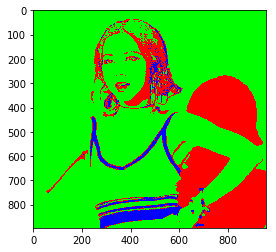

In [25]:
plt.imshow(np.asarray(gem_n_colors,dtype=np.uint8))
plt.savefig('gem_n_colors.png')

In [35]:
a = np.asarray([[1,1,1,3],[2,3,1,2]])
a[np.argwhere(a==1).T[0],np.argwhere(a==1).T[1]]

array([1, 1, 1, 1])